## Importing Necessary Libraries:

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [51]:
# n_sample is dataset size
# center is center points we need to work upon
# n_features are columns in dataset on which data depend upon, for this X, Y co-ordinates.
# random_state is used to set a reproducable dataset everytime to make it able to run qually on everyone machine.
X, y = make_blobs(n_samples=500, n_features=2, centers=5, random_state=3)

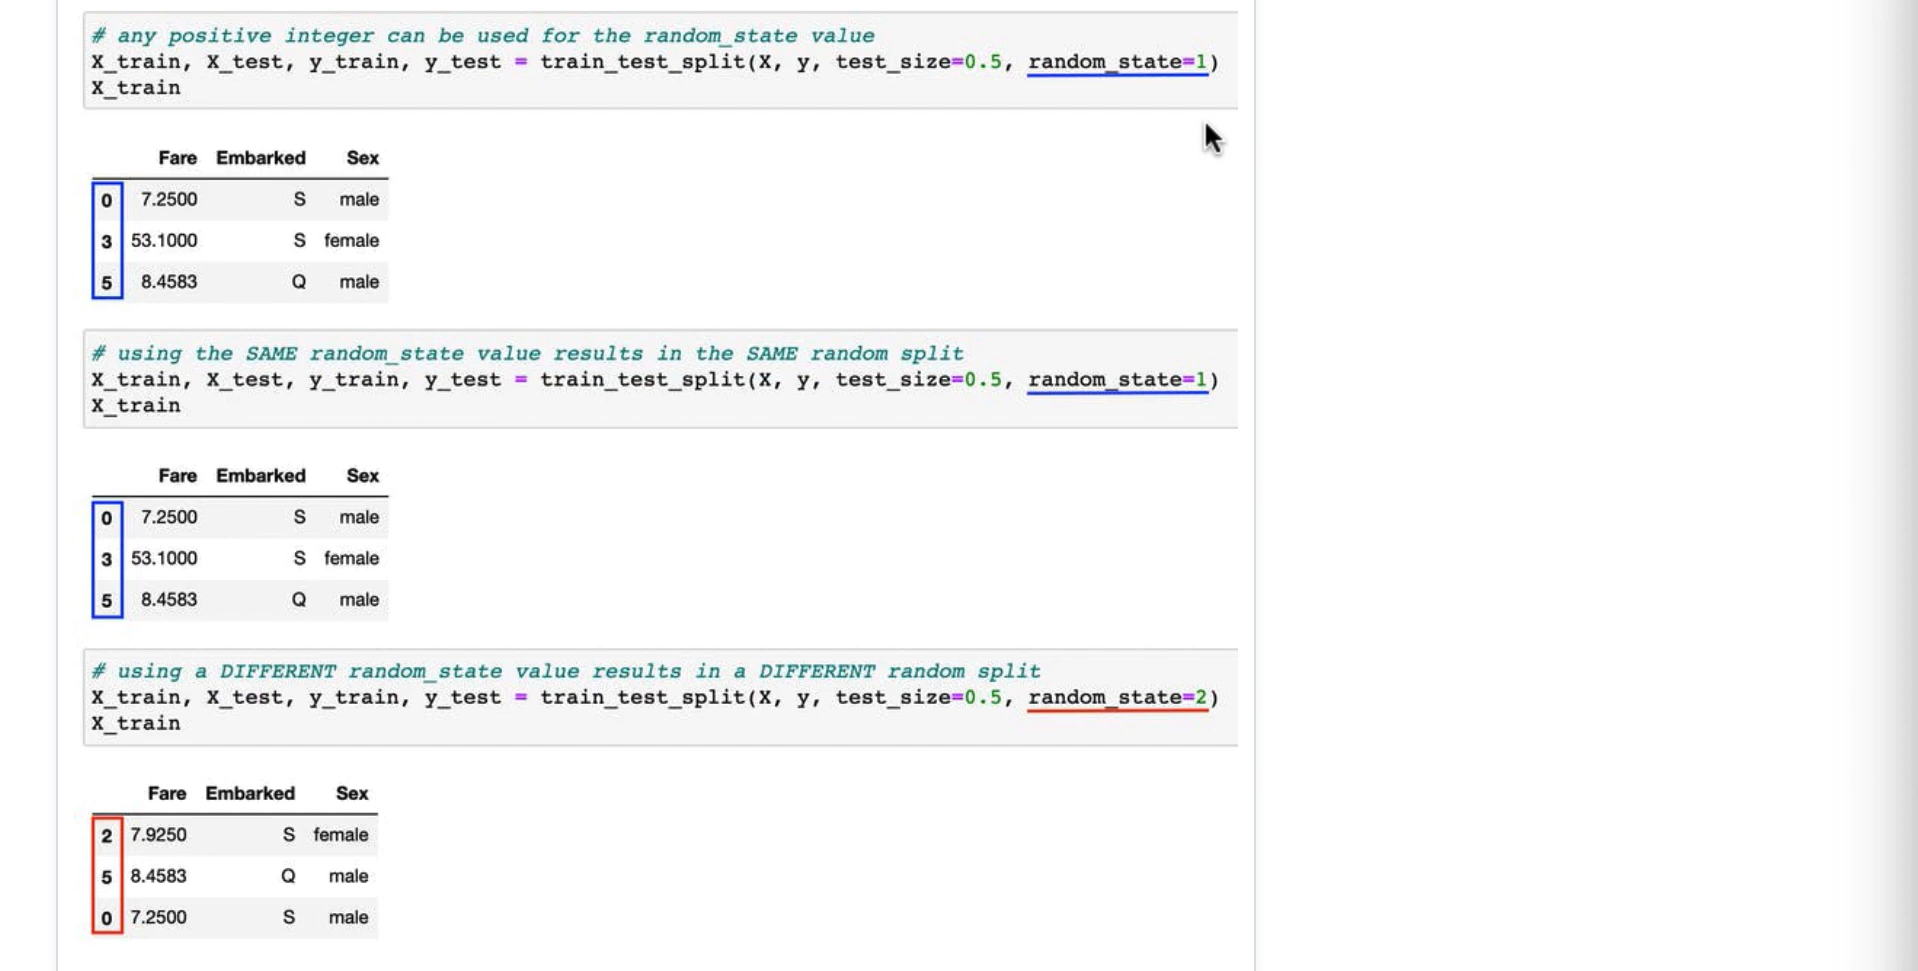

In [52]:
X

array([[-6.94238952e+00, -6.88072230e+00],
       [ 8.14492336e+00,  7.52724561e+00],
       [-3.61995355e+00, -7.72691339e-02],
       [-8.91918262e+00, -6.77218900e+00],
       [-7.37151112e+00, -5.05064290e+00],
       [-4.65743008e+00,  5.07750808e-02],
       [-9.85614721e+00, -1.94829844e+00],
       [-7.03064028e+00, -7.47212242e+00],
       [ 7.44598269e+00,  9.20313614e+00],
       [-6.74761638e+00, -5.40793452e+00],
       [ 8.73872704e+00,  5.97009465e+00],
       [-3.89871930e+00,  1.52191932e-01],
       [ 8.84851188e+00,  9.26501008e+00],
       [-6.83038032e+00, -7.68741713e+00],
       [-4.65780461e+00,  5.13396635e-01],
       [-9.14747586e+00, -5.83583269e+00],
       [ 8.27287322e+00,  6.92062212e+00],
       [-6.67147607e+00, -5.89031942e+00],
       [-7.33837507e+00, -5.96439930e+00],
       [ 6.96905011e+00,  6.34491640e+00],
       [ 1.87879015e+00,  3.51452443e+00],
       [ 1.46173901e+00,  3.38024741e+00],
       [-7.82304106e+00, -6.34230341e+00],
       [-3.

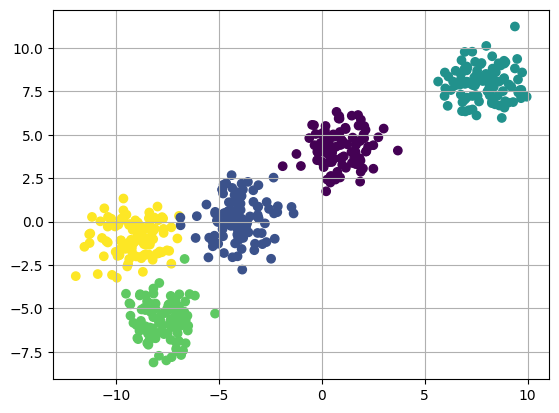

In [53]:
fig = plt.figure(0)
plt.grid(True)
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.show()
# below graph show 5 diff. centers of data as mentioned above as centers=5.

In [54]:
k = 5
colors = ['green', 'yellow', 'blue', 'cyan', 'red']


In [55]:
np.random.random(X.shape[1]) #means to provide 2 values to us from 0 to 1

array([0.36635085, 0.78001076])

`` But in grpah we have values from -10 to 10 , so let's convert it.``

In [56]:
10*(2*np.random.random((X.shape[1], )) -1)

array([7.37757263, 9.5299076 ])

In [57]:
clusters = {}
for idx in range(k):
    center = 10*(2*np.random.random((X.shape[1], )) -1)
    points = []
    cls = {
        'center' : center,
        'points' : [],
        'color'  : colors[idx]
    }
    
    clusters[idx] = cls

In [58]:
clusters

{0: {'center': array([-5.41101796,  2.10051164]),
  'points': [],
  'color': 'green'},
 1: {'center': array([ 5.95786203, -8.18225664]),
  'points': [],
  'color': 'yellow'},
 2: {'center': array([-4.48407513,  3.21614885]),
  'points': [],
  'color': 'blue'},
 3: {'center': array([ 6.5807554 , -3.93857294]),
  'points': [],
  'color': 'cyan'},
 4: {'center': array([-2.2545617 , -8.65000068]),
  'points': [],
  'color': 'red'}}

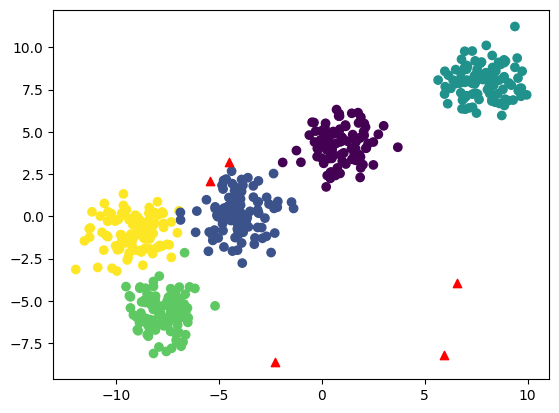

In [59]:
plt.scatter(X[:, 0], X[:, 1], c = y)

for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0], center[1], marker='^', c ='red')
    
plt.show()

`` The 5 red points above are the clusters formed, now we need to fine-tune them by taking the mean.``

In [60]:
def distance(v1, v2):
    return np.sqrt(np.sum((v1-v2)**2))

# below is same code in fomula format

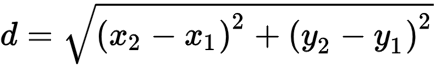

In [61]:
v1 = np.array([1, 2])
v2 = np.array([3, 4])
distance(v1, v2)

2.8284271247461903

``E-step assigns data points to the nearest cluster center with minimum value in that center.``

### Assigning the Clusters:


In [62]:
# Implementing E-Step as per some sources.
def assign_clusters():
    for idx in range(X.shape[0]):
        dist = []
        
        curr_x = X[idx]
        
        for i in range(k):
            dis = distance(curr_x, clusters[i]['center'])
            dist.append(dis)
            
        curr_cluster = np.argmin(dist)
        # argmin --> returns the indices of the minimum values along an axis.
        
        # update the points value in cluster dictionary which were empty above
        clusters[curr_cluster]['points'].append(curr_x)

In [63]:
assign_clusters()

In [64]:
clusters

{0: {'center': array([-5.41101796,  2.10051164]),
  'points': [array([-3.61995355, -0.07726913]),
   array([-4.65743008,  0.05077508]),
   array([-9.85614721, -1.94829844]),
   array([-3.8987193 ,  0.15219193]),
   array([-4.65780461,  0.51339663]),
   array([-3.78877994, -0.0248327 ]),
   array([-10.3969262 ,  -0.28827972]),
   array([-9.18719238, -0.47349654]),
   array([-4.45650534,  0.65156136]),
   array([-8.11324217, -0.41686247]),
   array([-10.22494442,   0.16581105]),
   array([-9.71656698, -1.47258778]),
   array([-8.94815361, -0.83618661]),
   array([-3.11648504, -0.65582356]),
   array([-6.85842659, -0.2135485 ]),
   array([-9.35219832, -2.15663244]),
   array([-9.22724642, -1.50874141]),
   array([-11.29535476,  -0.73378326]),
   array([-8.48487381, -4.59117843]),
   array([-3.56532734, -0.62107934]),
   array([-3.86270905, -2.7674181 ]),
   array([-2.69038288, -1.18156391]),
   array([-10.38104879,   0.26793302]),
   array([-5.29468637, -1.42274414]),
   array([-3.9505044

In [65]:
def plot_clusters():
    for i in clusters:
        pts = np.array(clusters[i]['points'])
        # try and except for pts providing 2 values: 1) colored points , 2) empty values
        try:
            plt.scatter(pts[:, 0], pts[:, 1], c = clusters[i]['color'])
        except:
            pass
        
        center = clusters[i]['center']
        plt.scatter(center[0], center[1], c = 'black', marker='^')

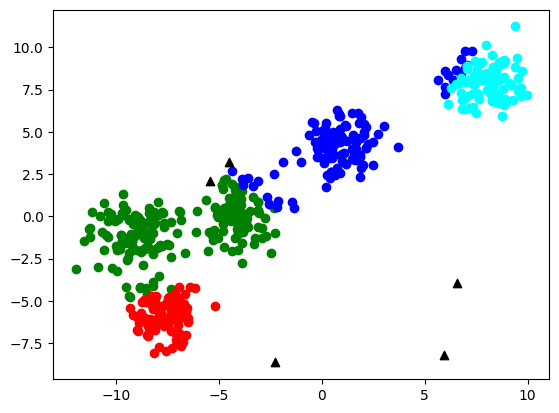

In [66]:
plot_clusters()

``Black points are the cluster centers for each color shown.``

### Update center locaiton by taking Means, and shift the centers:

In [67]:
# Implementing M-Step is another name for this:

def update_cluster():
    for idx in range(k):
        pts = np.array(clusters[idx]['points'])
        # for non-null values of points, like we did using try-catch above
        if pts.shape[0] > 0:
            new_center = pts.mean(axis = 0)  # axis = 0 is working along rows.
            clusters[idx]['center'] = new_center
            clusters[idx]['points'] = []

`` Keep running all three functions/steps defined multiple times until changes stop being made by model.``

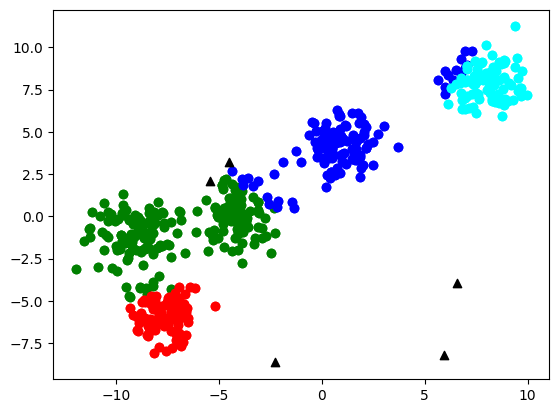

In [68]:
assign_clusters()
plot_clusters()
update_cluster()

``Code optimal solution gets stuck due to random_state being fixed, here we optimise that part.``

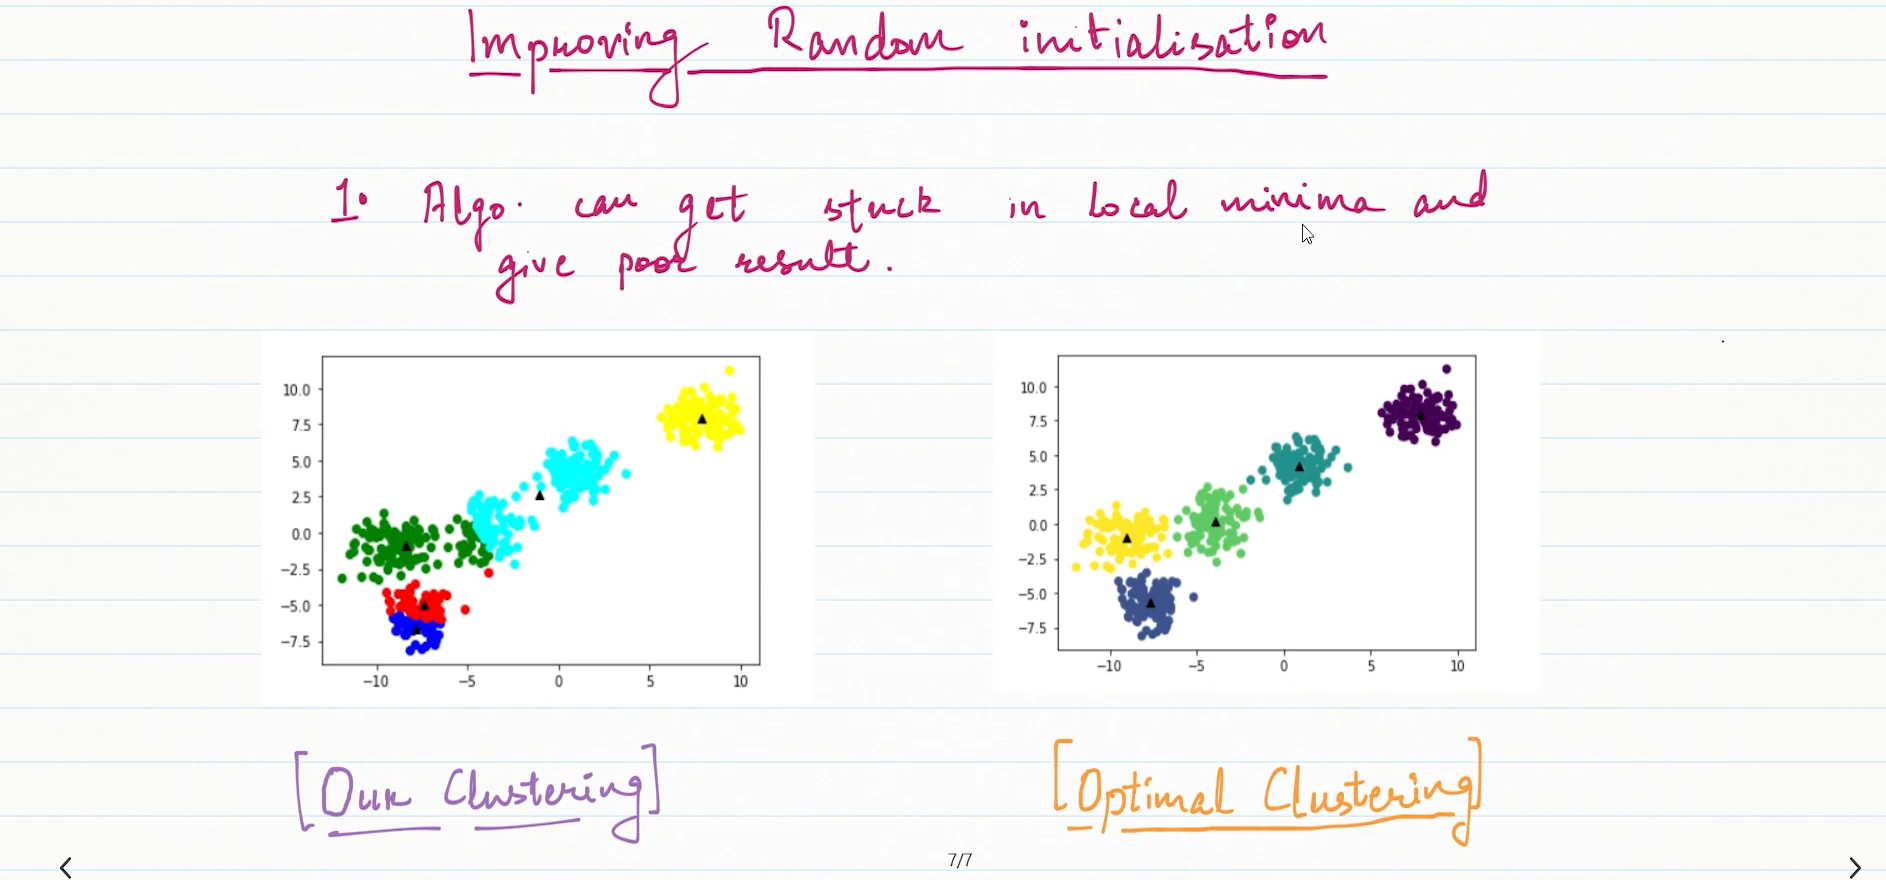